# Magnetic Fields in the Core of Stars and their Compact Reminants

We used MESA(Modulus for Experimentation in Stellar Astrophysics) to run simulations of stars between 2 to 20 solar masses and calcualted the magnetic fields in their core assuming an equipartition of kinetic energy density and magnetic energy density $\rho v^2 = \frac{B_{eq}^2}{4 \pi}$

In [117]:
import mesa_reader as mr
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
from fractions import Fraction 
import matplotlib.tri as tri

# Some constants

rsun= 6.96e10 # in cm 

h10 = mr.MesaData('10M_mag/10/LOGS/history.data')

#profile history data
#sets p19 to the profile data close to 0.3 H in core for the 10M star
p001 = mr.MesaData('10M_mag/LOGS/profile11.data')
p01 = mr.MesaData('10M_mag/LOGS/profile15.data')
p02 = mr.MesaData('10M_mag/LOGS/profile18.data')
p03 = mr.MesaData('10M_mag/LOGS/profile23.data')
p04 = mr.MesaData('10M_mag/LOGS/profile26.data')
p05 = mr.MesaData('10M_mag/LOGS/profile30.data')
p06 = mr.MesaData('10M_mag/LOGS/profile32.data')

mass001 = p001.data('mass')
mass01 = p01.data('mass')
mass02 = p02.data('mass')
mass03 = p03.data('mass')
mass04 = p04.data('mass')
mass05 = p05.data('mass')
mass06 = p06.data('mass')

B_eq06 = p06.data('B_equipartition')
B_eq05 = p05.data('B_equipartition')
B_eq04 = p04.data('B_equipartition')
B_eq03 = p03.data('B_equipartition')
B_eq02 = p02.data('B_equipartition')
B_eq01 = p01.data('B_equipartition')
B_eq001 = p001.data('B_equipartition')

# Functions, Variables and Trimming down Data

In this section we define most of the variables we will be using throughtout the code as well as some function that give us information about event in throughout the stellar evolution and the start and end arrays which will remove the "hooks" in the HR Diagram of these stars so we can use these diagrams as a clear representation on how the stars are changing in time

In [118]:
#cuts off values, this was needed to remove "hooks" in HR diagrams
start = np.zeros(21)
end = np.zeros(21)
count = np.arange(1,21)
for t in count:
    n = 1
    val = 0
    name = mr.MesaData('10M_mag/'+str(t)+'/LOGS/history.data').data('center_h1')

    while (np.size(name) > n):
        if(name[n] <= 0.67 and val == 0):
            #print t
            start[t] = n
            val = 1
        n = n+1
    n = 1
    val = 0
    while (np.size(name) > n):
        if(name[n] <= 0.05 and val == 0):
            #print n
            end[t] = n
            val = 1
        n = n+1

In [119]:
numbers = np.arange(1,21)
for t in numbers:
    can = 'h'+str(t)
    vars()[can] = mr.MesaData('10M_mag/'+str(t)+'/LOGS/history.data')
    can1 = 'Lum'+str(t)
    vars()[can1] = vars()[can].data('log_L')
    can2 = 'Teff'+str(t)
    vars()[can2] = vars()[can].data('log_Teff')
    can3 = 'B_ave'+str(t)
    vars()[can3] = vars()[can].data('B_ave')
    can4 = 'B_max'+str(t)
    vars()[can4] = vars()[can].data('B_max')
    can5 = 'mass'+str(t)
    vars()[can5] = vars()[can].data('star_mass')
    can6 = 'center_h1'+str(t)
    vars()[can6] = vars()[can].data('center_h1')
    can7 = 'BBA'+str(t)
    vars()[can7] = np.true_divide(vars()[can3][int(start[t]):int(end[t])],1000)
    can8 = 'BBM'+str(t)
    vars()[can8] = np.true_divide(vars()[can4][int(start[t]):int(end[t])],1000)
    can9 = 'MM'+str(t)
    vars()[can9] = np.true_divide(vars()[can5][int(start[t]):int(end[t])],1000)

In [38]:
#this section of code is to get where 0.5H and 0.1H are in the plots in relation to the max magnetic fields
#and staring the B values of such into certain arrays
B_max_05H = np.zeros(21)
Lum05H = np.zeros(21)
Teff05H = np.zeros(21)
B_max_01H = np.zeros(21)
Lum01H = np.zeros(21)
Teff01H = np.zeros(21)
B_ave_05H = np.zeros(21)
B_ave_01H = np.zeros(21)
count = np.arange(1,21)
for t in count:
    n = 1
    val = 0
    name = mr.MesaData('10M_mag/'+str(t)+'/LOGS/history.data').data('center_h1')
    
    while (np.size(name) > n):
        if(name[n] <= 0.5 and val == 0):
            #print t
            B_maxx = mr.MesaData('10M_mag/'+str(t)+'/LOGS/history.data').data('B_max')
            B_avex = mr.MesaData('10M_mag/'+str(t)+'/LOGS/history.data').data('B_ave')
            Lumx = mr.MesaData('10M_mag/'+str(t)+'/LOGS/history.data').data('log_L')
            Teffx = mr.MesaData('10M_mag/'+str(t)+'/LOGS/history.data').data('log_Teff')
            Lum05H[t] = Lumx[n]
            Teff05H[t] = Teffx[n]
            B_max_05H[t] = B_maxx[n]
            B_ave_05H[t] = B_avex[n]
            val = 1 
        n = n+1
    n = 1 
    val = 0
    while (np.size(name) > n):
        if(name[n] <= 0.1 and val == 0):
            #print n
            B_maxx = mr.MesaData('10M_mag/'+str(t)+'/LOGS/history.data').data('B_max')
            B_avex = mr.MesaData('10M_mag/'+str(t)+'/LOGS/history.data').data('B_ave')
            Lumx = mr.MesaData('10M_mag/'+str(t)+'/LOGS/history.data').data('log_L')
            Teffx = mr.MesaData('10M_mag/'+str(t)+'/LOGS/history.data').data('log_Teff')
            Lum01H[t] = Lumx[n]
            Teff01H[t] = Teffx[n]
            B_max_01H[t] = B_maxx[n]
            B_ave_01H[t] = B_avex[n]
            val = 1 
        n = n+1

In [59]:
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['legend.borderpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 22

# Plots and Graphs

This section contains the bulk of the results.

/Users/lsanchez/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/Users/lsanchez/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/Users/lsanchez/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/lsanchez/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/Users/lsanchez/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/Users/lsanchez/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/Users/lsanchez/anaconda2/lib/

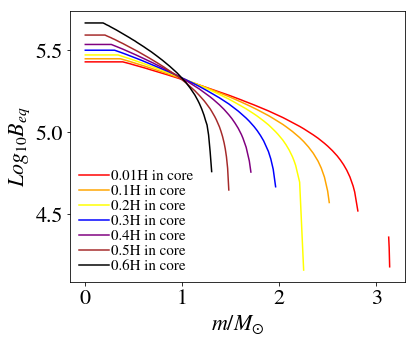

In [60]:
plt.plot(mass001[700:np.size(mass001)], np.log10(B_eq001[700:np.size(mass001)]), color='red', label='0.01H in core')
plt.plot(mass01[700:np.size(mass001)], np.log10(B_eq01[700:np.size(mass001)]), color='orange', label='0.1H in core')
plt.plot(mass02[700:np.size(mass001)], np.log10(B_eq02[700:np.size(mass001)]), color='yellow', label='0.2H in core')
plt.plot(mass03[700:np.size(mass001)], np.log10(B_eq03[700:np.size(mass001)]), color='blue', label='0.3H in core')
plt.plot(mass04[700:np.size(mass001)], np.log10(B_eq04[700:np.size(mass001)]), color='purple', label='0.4H in core')
plt.plot(mass05[700:np.size(mass001)], np.log10(B_eq05[700:np.size(mass001)]), color='brown', label='0.5H in core')
plt.plot(mass06[700:np.size(mass001)], np.log10(B_eq06[700:np.size(mass001)]), color='black', label='0.6H in core')
#plt.title('Magnetic fields in the core of a 10M star at different stages')
plt.xlabel('$m/M_{\odot}$')
plt.ylabel('$Log_{10}B_{eq}$')
#handles, labels = plt.subplot().get_legend_handles_labels()
#plt.subplot().l
plt.legend(loc='lower left')
#plt.savefig('B_field_10M_stellar_evolution')
#bbox_to_anchor=(1.05, 1),

mkipp plot showing the strength of the magnetic field in the core and how the convective region in the core shrinks with time

Reading profile data
Error value of B fell bellow zero
Reading history data
Constructing mixing regions
there are 40 mixing zones


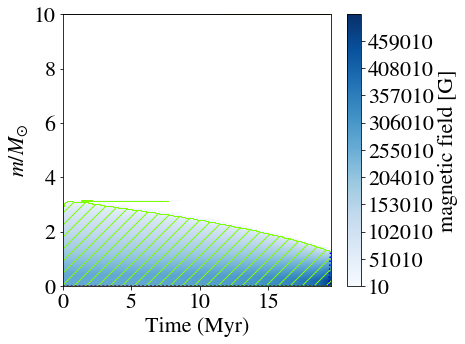

In [41]:

import mkipp
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
axis = plt.gca()
#mkipp.kipp_plot returns an object containing
#   kipp_plot.contour_plot : the return value of matplotlibs contourf. Can be
#                            used to create a colorbar with plt.colorbar() 
#   kipp_plot.histories    : list of history files read. data can be accesed from this
#                            using the get("column_name") function
#   kipp_plot.xlims        : limits of data in x coordinate
kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(
        logs_dirs = ['10M_mag/LOGS'],
        xaxis = "star_age",
        yaxis = "mass",
        time_units = "Myr",
        #identifier = "y",
        identifier = "B_equipartition", 
        log10_on_data = False,
        log_levels = False,
        levels = np.arange(10,510000,1000),
        decorate_plot = False,
        save_file = False), axis = axis)
bar = plt.colorbar(kipp_plot.contour_plot,pad=0.05)
bar.set_label("magnetic field [G]")
axis.set_xlabel("Time (Myr)")
axis.set_ylabel("$m/M_{\odot}$")
axis.set_xlim(kipp_plot.xlims)
#plt.title('Magnetic field within a 10M star')
plt.show()
#fig.savefig("mkipp_B_field.png")
fig.savefig("mkipp_B_fieldhalf.pdf")

The following two plots show the ranges of the maximum and average magnetic fields respectively, we have marked down two point in the stellar evolution, 50% and 10% hydrogen left on the core. This helps us see that the magnetic fields are increasing with math time and mass

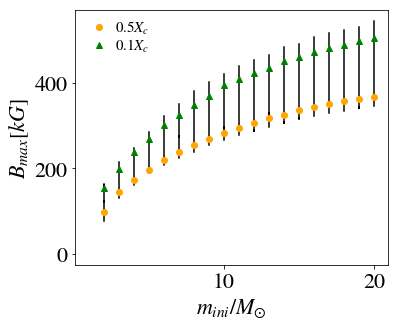

In [101]:
#plot of magnetic fields, this B fields are divided by 1000 to get values that are easier to read
for t in numbers:
    can = 'h'+str(t)
    vars()[can] = mr.MesaData('10M_mag/'+str(t)+'/LOGS/history.data')
    can3 = 'B_ave'+str(t)
    vars()[can3] = vars()[can].data('B_ave')
    can4 = 'B_max'+str(t)
    vars()[can4] = vars()[can].data('B_max')
    can5 = 'mass'+str(t)
    vars()[can5] = vars()[can].data('star_mass')
    can6 = 'center_h1'+str(t)
    vars()[can6] = vars()[can].data('center_h1')
    can7 = 'BBA'+str(t)
    BM = 'cB_max'+str(t)
    vars()[BM] = np.true_divide(vars()[can4],1000)
    can8 = 'BBM'+str(t)
    vars()[can8] = np.true_divide(vars()[can4][int(start[t]):int(end[t])],1000)
    can9 = 'MM'+str(t)
    vars()[can9] = vars()[can5][int(start[t]):int(end[t])]
    plt.plot(vars()[can9],(vars()[can8]), color='black')
cB_max_05H = np.true_divide(B_max_05H, 1000)
cB_max_01H = np.true_divide(B_max_01H, 1000)
numbers2 = np.arange(3,21)
for t in numbers2:
    plt.plot(t, cB_max_05H[t],'o', color='orange')
    plt.plot(t,cB_max_01H[t],'^', color='green')
plt.plot(2, cB_max_05H[2],'o', label='$0.5X_c$', color='orange')
plt.plot(2, cB_max_01H[2],'^', label='$0.1X_c$', color='green')
cB_max_05H = np.true_divide(B_max_05H, 1000)
cB_max_01H = np.true_divide(B_max_01H, 1000)

#plt.xscale('log')
#plt.yscale('log')
#plt.title('B_max vs mass')
plt.xlabel('$m_{ini}/M_{\odot}$')
plt.ylabel('$B_{max} [kG]$')
plt.legend(loc='upper left')
plt.tight_layout()

#plt.savefig('B_max_vs_diff_mass.pdf')


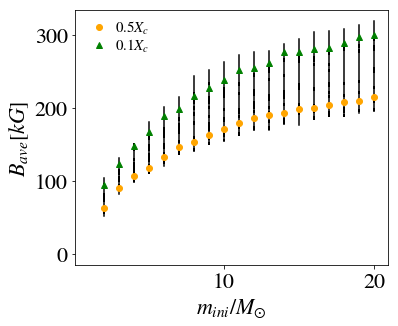

In [103]:
for t in numbers:
    can = 'h'+str(t)
    vars()[can] = mr.MesaData('10M_mag/'+str(t)+'/LOGS/history.data')
    can3 = 'B_ave'+str(t)
    vars()[can3] = vars()[can].data('B_ave')
    can4 = 'B_max'+str(t)
    vars()[can4] = vars()[can].data('B_max')
    can5 = 'mass'+str(t)
    vars()[can5] = vars()[can].data('star_mass')
    can6 = 'center_h1'+str(t)
    vars()[can6] = vars()[can].data('center_h1')
    can7 = 'BBA'+str(t)
    BA = 'cB_ave'+str(t)
    vars()[BA] = np.true_divide(vars()[can3],1000)
    can8 = 'BBA'+str(t)
    vars()[can8] = np.true_divide(vars()[can3][int(start[t]):int(end[t])],1000)
    can9 = 'MM'+str(t)
    vars()[can9] = vars()[can5][int(start[t]):int(end[t])]
    plt.plot(vars()[can9],(vars()[can8]), color='black')
cB_ave_05H = np.true_divide(B_ave_05H, 1000)
cB_ave_01H = np.true_divide(B_ave_01H, 1000)
numbers2 = np.arange(3,21)
for t in numbers2:
    plt.plot(t, cB_ave_05H[t],'o', color='orange')
    plt.plot(t,cB_ave_01H[t],'^', color='green')
plt.plot(2, cB_ave_05H[2],'o', label='$0.5X_c$', color='orange')
plt.plot(2, cB_ave_01H[2],'^', label='$0.1X_c$', color='green')

#plt.title('B_ave vs mass')
plt.xlabel('$m_{ini}/M_{\odot}$')
plt.ylabel('$B_{ave} [kG]$')
plt.legend(loc='upper left')
plt.tight_layout() 
#plt.savefig('B_ave_vs_diff_mass.pdf')

# HR Diagrams
In this section of the code we use HR diagrams to further explore the data by noting that from left to right the graphs show hoe the stars evolved in time, we interpolated the magnetic field data between each HR diagram. 

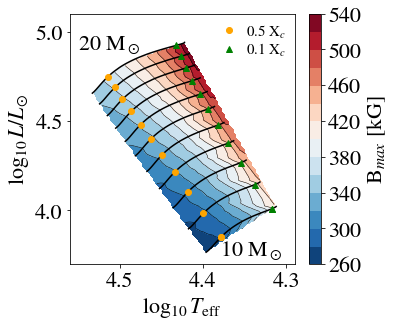

In [112]:
import matplotlib.tri as tri

fig, ax = plt.subplots()

numbers3 = np.arange(10,21)
for t in numbers3:
    can = 'h'+str(t)
    vars()[can] = mr.MesaData('10M_mag/'+str(t)+'/LOGS/history.data')    
    can1 = 'Lum'+str(t)
    vars()[can1] = vars()[can].data('log_L')
    can2 = 'Teff'+str(t)
    vars()[can2] = vars()[can].data('log_Teff')
    can3 = 'TT'+str(t)
    vars()[can3] = vars()[can2][start[t].astype(int):end[t].astype(int)]
    can4 = 'LL'+str(t)
    vars()[can4] = vars()[can1][start[t].astype(int):end[t].astype(int)]
    ax.plot(vars()[can3],vars()[can4], color='black')
    ax.plot(Teff05H[t],Lum05H[t], 'o', color='orange')
    ax.plot(Teff01H[t],Lum01H[t], '^', color='green')
ax.plot(Teff05H[10],Lum05H[10], 'o', color='orange', label='0.5 X$_{c}$')
ax.plot(Teff01H[10],Lum01H[10], '^', color='green', label='0.1 X$_{c}$')

L = np.hstack((LL10,LL11,LL12,LL13,LL14,LL15,LL16,LL17,LL18,LL19,LL20))
T = np.hstack((TT10,TT11,TT12,TT13,TT14,TT15,TT16,TT17,TT18,TT19,TT20))
B1 = np.hstack((BBM10,BBM11,BBM12,BBM13,BBM14,BBM15,BBM16,BBM17,BBM18,BBM19,BBM20))

xi = np.linspace(4.29, 4.56, 100)
yi = np.linspace(3.7, 5.1, 100)

triang = tri.Triangulation(T,L)
interpolator = tri.LinearTriInterpolator(triang, B1)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

ax.contour(xi, yi, zi, 14, linewidths=0.5, colors='k')
cntr1 = ax.contourf(xi, yi, zi, 14, cmap="RdBu_r")

fig.colorbar(cntr1, ax=ax).ax.set_ylabel('B$_{max}$ [kG]')

ax.annotate('20 M$_\odot$', xy=(4.55, 4.90), xytext=(4.55, 4.90))
ax.annotate('10 M$_\odot$', xy=(4.38, 3.75), xytext=(4.38, 3.75))

#ax.colorbar(ax.subplot().tricontourf(Teff15, Lum15, B_ave15, cmap="RdBu_r")).ax.set_ylabel('Magnetic field')

#ax.set_title('HR Diagram with Magentic Fields During the \n Main Sequence for Stars of Different Masses')
ax.set_xlabel(r'$\log_{10} \,T_{\rm eff}$')
ax.set_ylabel("$\log_{10} \,L/ L_{\odot}$")
ax.legend(loc='upper right')
ax.invert_xaxis()
plt.tight_layout()
plt.savefig('HR_diagram_Bmaxfield_interpolation2.pdf')

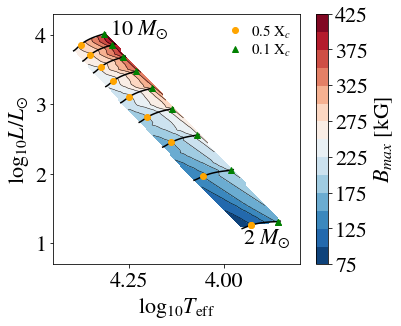

In [116]:
import matplotlib.tri as tri

fig, ax = plt.subplots()

numbers4 = np.arange(2,11)
for t in numbers4:
    can = 'h'+str(t)
    vars()[can] = mr.MesaData('10M_mag/'+str(t)+'/LOGS/history.data')    
    can1 = 'Lum'+str(t)
    vars()[can1] = vars()[can].data('log_L')
    can2 = 'Teff'+str(t)
    vars()[can2] = vars()[can].data('log_Teff')
    can3 = 'TT'+str(t)
    vars()[can3] = vars()[can2][start[t].astype(int):end[t].astype(int)]
    can4 = 'LL'+str(t)
    vars()[can4] = vars()[can1][start[t].astype(int):end[t].astype(int)]
    ax.plot(vars()[can3],vars()[can4], color='black')
    ax.plot(Teff05H[t],Lum05H[t], 'o', color='orange')
    ax.plot(Teff01H[t],Lum01H[t], '^', color='green')
ax.plot(Teff05H[2],Lum05H[2], 'o', color='orange', label='0.5 X$_{c}$')
ax.plot(Teff01H[2],Lum01H[2], '^', color='green', label='0.1 X$_{c}$')

L = np.hstack((LL2,LL3,LL4,LL5,LL6,LL7,LL8,LL9,LL10))
T = np.hstack((TT2,TT3,TT4,TT5,TT6,TT7,TT8,TT9,TT10))
B1 = np.hstack((BBM2,BBM3,BBM4,BBM5,BBM6,BBM7,BBM8,BBM9,BBM10))

xi = np.linspace(3.8, 4.45, 100)
yi = np.linspace(0.7, 4.3, 100)

triang = tri.Triangulation(T,L)
interpolator = tri.LinearTriInterpolator(triang, B1)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

ax.contour(xi, yi, zi, 14, linewidths=0.5, colors='k')
cntr1 = ax.contourf(xi, yi, zi, 14, cmap="RdBu_r")

fig.colorbar(cntr1, ax=ax).ax.set_ylabel('$B_{max}$ [kG]')
#ax.plot(Teff10, Lum10, color='black', ms=3)

ax.annotate('2 $M_{\odot}$', xy=(3.95,1), xytext=(3.95,1))
ax.annotate('10 $M_{\odot}$', xy=(4.3, 4.0), xytext=(4.3, 4.0))

#ax.colorbar(ax.subplot().tricontourf(Teff15, Lum15, B_ave15, cmap="RdBu_r")).ax.set_ylabel('Magnetic field')

#ax.set_title('HR Diagram with Magentic Fields During the \n Main Sequence for Stars of Different Masses')
ax.set_xlabel(r'$\log_{10} T_{\rm eff}$')
ax.set_ylabel("$\log_{10} L/ L_{\odot}$")
ax.legend(loc='upper right')
ax.invert_xaxis()
plt.tight_layout()
plt.savefig('HR_diagram_Bmaxfield_interpolation3.pdf')

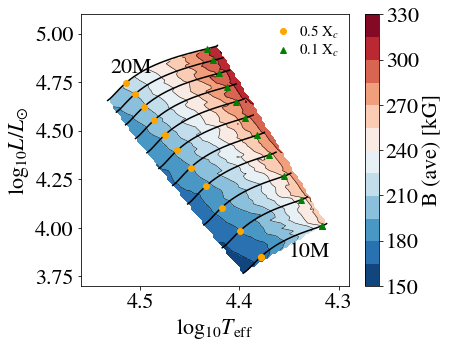

In [114]:
import matplotlib.tri as tri

fig, ax = plt.subplots()

numbers4 = np.arange(10,21)
for t in numbers4:
    can = 'h'+str(t)
    vars()[can] = mr.MesaData('10M_mag/'+str(t)+'/LOGS/history.data')    
    can1 = 'Lum'+str(t)
    vars()[can1] = vars()[can].data('log_L')
    can2 = 'Teff'+str(t)
    vars()[can2] = vars()[can].data('log_Teff')
    can3 = 'TT'+str(t)
    vars()[can3] = vars()[can2][start[t].astype(int):end[t].astype(int)]
    can4 = 'LL'+str(t)
    vars()[can4] = vars()[can1][start[t].astype(int):end[t].astype(int)]
    ax.plot(vars()[can3],vars()[can4], color='black')
    ax.plot(Teff05H[t],Lum05H[t], 'o', color='orange')
    ax.plot(Teff01H[t],Lum01H[t], '^', color='green')
ax.plot(Teff05H[10],Lum05H[10], 'o', color='orange', label='0.5 X$_{c}$')
ax.plot(Teff01H[10],Lum01H[10], '^', color='green', label='0.1 X$_{c}$')

L = np.hstack((LL10,LL11,LL12,LL13,LL14,LL15,LL16,LL17,LL18,LL19,LL20))
T = np.hstack((TT10,TT11,TT12,TT13,TT14,TT15,TT16,TT17,TT18,TT19,TT20))
B1 = np.hstack((BBA10,BBA11,BBA12,BBA13,BBA14,BBA15,BBA16,BBA17,BBA18,BBA19,BBA20))

xi = np.linspace(4.29, 4.56, 100)
yi = np.linspace(3.7, 5.1, 100)

triang = tri.Triangulation(T,L)
interpolator = tri.LinearTriInterpolator(triang, B1)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

ax.contour(xi, yi, zi, 14, linewidths=0.5, colors='k')
cntr1 = ax.contourf(xi, yi, zi, 14, cmap="RdBu_r")

fig.colorbar(cntr1, ax=ax).ax.set_ylabel('B (ave) [kG]')

ax.annotate('20M', xy=(4.53, 4.8), xytext=(4.53, 4.8))
ax.annotate('10M', xy=(4.35, 3.85), xytext=(4.35, 3.85))

ax.set_xlabel(r'$\log_{10} T_{\rm eff}$')
ax.set_ylabel("$\log_{10} L/ L_{\odot}$")
ax.legend(loc='upper right')
ax.invert_xaxis()
plt.savefig('HR_diagram_Bavefield_interpolation2')

# Onwards to Star Collapse!

In this section we calculate the magnetic fields of the compact remenants of the stars by assuming a conservation of flux $\Phi_{B1} = \Phi_{B2}$. For the surface ares on neutron stars we first used we first used both a lower an upper limit in their size are realized these differeneces were not significant so we stuck to the lower limit. As for White Dwarfs we used the information published by Karim El-Badry (https://arxiv.org/pdf/1805.05849.pdf) which gives us accurate numbers on the expected mass of these White Dwarfs, use this to calculate the surface area and from these the final mafnetic field.

In [55]:
#this function is to calculate the magnetic fields of compact remenant of a star assuming the magnetic field from the
#main sequence remained in the star, conservation of flux was used to calculate the final magnetic field
from fractions import Fraction 
halfcount = np.arange(2)
halfWD = np.zeros(2)
coreh = np.zeros(2)
WD2_B1 = np.zeros(2)
WD2_R1 = np.zeros(2)
WD_truer = np.zeros(2)

count = np.arange(1,21)
WD1_B1 = np.zeros(21)
WD1_R1 = np.zeros(21)
NS1_B1 = np.zeros(21)
NS1_R1 = np.zeros(21)
NS2_B1 = np.zeros(21)
NS2_R1 = np.zeros(21)
corex = np.zeros(21)
rsun_km = rsun/100000
WD_trueR = np.zeros(21)
coreB_lowM = np.zeros(21)
#1.520 --> 0.556, 2.5 -->0.645

#this is to deal with non intiger initial mass
for t in halfcount:
    r = 0
    hfp1 = mr.MesaData('10M_mag/threehalfs/LOGS/history.data').data('mass_conv_core')
    hfp2 = mr.MesaData('10M_mag/threehalfs/LOGS/profile6.data').data('radius')
    hfp3 = mr.MesaData('10M_mag/threehalfs/LOGS/profile6.data').data('mass')
    hB1 = mr.MesaData('10M_mag/threehalfs/LOGS/profile6.data').data('B_equipartition')
    hfp1x = hfp1[-1]
    if (t == 0):
        core = 0.556
        coreh[t] = core
        while(hfp3[r]>core):
            r=r+1
    r = 0
    tfp1 = mr.MesaData('10M_mag/2-5/LOGS/history.data').data('mass_conv_core')
    tfp2 = mr.MesaData('10M_mag/2-5/LOGS/profile6.data').data('radius')
    tfp3 = mr.MesaData('10M_mag/2-5/LOGS/profile6.data').data('mass')
    tB1 = mr.MesaData('10M_mag/2-5/LOGS/profile6.data').data('B_equipartition')
    if (t == 1):
        core = 0.645
        coreh[t] = core
        while(hfp3[r]>core):
            r=r+1
    WD2_B1[t] = hB1[r]
    WD2_R1[t] = hfp2[r]
    
#main code finds were the mass cuts off and associates this with the radius and magnetic filed of that region
#WD have spesific values for the cores based on the data of someone else research, (specify who)
for t in count:
    n = 0
    par1 = mr.MesaData('10M_mag/'+str(t)+'/LOGS/history.data').data('mass_conv_core') #in solar masses
    par2 = mr.MesaData('10M_mag/'+str(t)+'/LOGS/profile6.data').data('radius') #in solar radia
    par3 = mr.MesaData('10M_mag/'+str(t)+'/LOGS/profile6.data').data('mass') #insolar masses
    B_eqpar = mr.MesaData('10M_mag/'+str(t)+'/LOGS/profile6.data').data('B_equipartition') #in solar radii
    par1x = par1[-1]
    if (t == 1):
        core = 0.505
        corex[t] = core
        while(par3[n]>core):
            n=n+1
    if (t == 2):
        core = 0.6
        corex[t] = core
        while(par3[n]>core):
            n=n+1
    if (t == 3):
        core = 0.714
        corex[t] = core
        while(par3[n]>core):
            n=n+1
    if (t == 4):
        core = 0.839
        corex[t] = core
        while(par3[n]>core):
            n=n+1
    if (t == 5):
        core = 0.907
        corex[t] = core
        while(par3[n]>core):
            n=n+1
    if (t == 6):
        core = 1.043
        corex[t] = core
        while(par3[n]>core):
            n=n+1
    if (t == 7):
        core = 1.207
        corex[t] = core
        while(par3[n]>core):
            n=n+1
    if (t == 8):
        core = 1.373
        corex[t] = core
        while(par3[n]>core):
            n=n+1
    WD1_B1[t] = B_eqpar[n]
    WD1_R1[t] = par2[n]
for t in count:
    n = 0
    par1 = mr.MesaData('10M_mag/'+str(t)+'/LOGS/history.data').data('mass_conv_core') #in solar masses
    par2 = mr.MesaData('10M_mag/'+str(t)+'/LOGS/profile6.data').data('radius') #in solar radia
    par3 = mr.MesaData('10M_mag/'+str(t)+'/LOGS/profile6.data').data('mass') #insolar masses
    B_eqpar = mr.MesaData('10M_mag/'+str(t)+'/LOGS/profile6.data').data('B_equipartition') #in solar radia
    par1x = par1[-1]
    if (par1x < 1.4 and par1x != 0):
        core = par1x
        while(par3[n]>core):
            n=n+1
    if (par1x > 1.4):
        core = 1.4
        while(par3[n]>core):
            n=n+1
    #print n
    NS1_B1[t] = B_eqpar[n]
    NS1_R1[t] = par2[n]
for t in count:
    n = 0
    par1 = mr.MesaData('10M_mag/'+str(t)+'/LOGS/history.data').data('mass_conv_core') #in solar masses
    par2 = mr.MesaData('10M_mag/'+str(t)+'/LOGS/profile6.data').data('radius') #in solar radia
    par3 = mr.MesaData('10M_mag/'+str(t)+'/LOGS/profile6.data').data('mass') #insolar masses
    B_eqpar = mr.MesaData('10M_mag/'+str(t)+'/LOGS/profile6.data').data('B_equipartition') #in solar radia
    par1x = par1[-1]
    if (par1x < 2.16 and par1x != 0):
        core = par1x
        while(par3[n]>core):
            n=n+1
    if (par1x > 2.16):
        core = 2.16
        while(par3[n]>core):
            n=n+1
    #print n
    NS2_B1[t] = B_eqpar[n]
    NS2_R1[t] = par2[n]

#some constant
NS_R1 = 10./rsun_km #solar radius
WD_R1 = 0.008 #solar radius
WD_R2 = 0.02 #solar radius

#Assigment of magnetic fields
WD_lowR = np.true_divide((WD1_R1**2)*WD1_B1,WD_R1**2)
WD_highR = np.true_divide((WD1_R1**2)*WD1_B1,WD_R2**2)
for t in count:
    if (corex[t] == 0):
        WD_trueR[t] = 1
    if(corex[t] != 0):
        WD_trueR[t] = ((WD1_R1[t]**2)*WD1_B1[t]/((((2.08e-6)/(corex[t]))**Fraction('2/3'))))
for t in halfcount:
    if (coreh[t] == 0):
        WD_truer[t] = 1
    if(coreh[t] != 0):
        WD_truer[t] = ((WD2_R1[t]**2)*WD2_B1[t]/((((2.08e-6)/(coreh[t]))**Fraction('2/3')))) 
        
NS_lowM = np.true_divide((NS1_R1**2)*NS1_B1,NS_R1**2)
NS_highM = np.true_divide((NS2_R1**2)*NS2_B1,NS_R1**2)
#modification for when the Bfield was set to 1
for t in count[0:3]:
    p=-1
    par1 = mr.MesaData('10M_mag/'+str(t)+'/LOGS/history.data').data('mass_conv_core') #in solar masses
    par2 = mr.MesaData('10M_mag/'+str(t)+'/LOGS/profile6.data').data('radius') #in solar radia
    par3 = mr.MesaData('10M_mag/'+str(t)+'/LOGS/profile6.data').data('mass') #insolar masses
    B_eqpar = mr.MesaData('10M_mag/'+str(t)+'/LOGS/profile6.data').data('B_equipartition') #in solar radia
    par1x = par1[-1]
    if (WD_trueR[t] == 1):
        while(B_eqpar[p] != 0):
            n=n-1
        y= np.size(B_eqpar)-n-1
        WD1_B1[t] = B_eqpar[y]
        WD1_R1[t] = par2[y]
        WD_trueR[t] = ((WD1_R1[t]**2)*WD1_B1[t]/((((2.08e-6)/(corex[t]))**Fraction('2/3'))))
hfp1 = mr.MesaData('10M_mag/threehalfs/LOGS/history.data').data('mass_conv_core')
hfp2 = mr.MesaData('10M_mag/threehalfs/LOGS/profile6.data').data('radius')
hfp3 = mr.MesaData('10M_mag/threehalfs/LOGS/profile6.data').data('mass')
hB1 = mr.MesaData('10M_mag/threehalfs/LOGS/profile6.data').data('B_equipartition')
p = -1
if (WD_truer[0] == 1):
    while(hB1[p] != 0):
        n=n-1
    y= np.size(hB1)-n-1
    WD2_B1[0] = B_eqpar[y]
    WD2_R1[0] = par2[y]
    WD_truer[0] = ((WD2_R1[0]**2)*WD2_B1[0]/((((2.08e-6)/(coreh[0]))**Fraction('2/3')))) 
p = -1
tfp1 = mr.MesaData('10M_mag/2-5/LOGS/history.data').data('mass_conv_core')
tfp2 = mr.MesaData('10M_mag/2-5/LOGS/profile6.data').data('radius')
tfp3 = mr.MesaData('10M_mag/2-5/LOGS/profile6.data').data('mass')
tB1 = mr.MesaData('10M_mag/2-5/LOGS/profile6.data').data('B_equipartition')
if (WD_truer[1] == 1):
    while(tB1[p] != 0):
        n=n-1
    y= np.size(tB1)-n-1
    WD2_B1[1] = tB1[y]
    WD2_R1[1] = par2[y]
    WD_truer[1] = ((WD2_R1[1]**2)*WD2_B1[1]/((((2.08e-6)/(coreh[1]))**Fraction('2/3')))) 

Charts using the upper and lower limits and lower limit of  of the mass of the neutron stars to get a range for the values of the magnetic fields with conservstion of flux, the second chart also get these limits for white dwarfs

In [56]:
num = np.arange(0,21)
pd.DataFrame({'initial Mass' : num,
              #'$WD Bfield[G] 1.3M{\odot} 0.008R{\odot}$' : WD_lowR[1:21],
              #'$WD Bfield[G] 1.3M{\odot} 0.008R{\odot}$' : WD_highR,
              '$NS Bfield[G] 1.4M{\odot}$' : NS_lowM,
              '$NS Bfield[G] 2.16M{\odot}$' : NS_highM,
    
})

,$NS Bfield[G] 1.4M{\odot}$,$NS Bfield[G] 2.16M{\odot}$,initial Mass
0,0.000000e+00,0.000000e+00,0
1,0.000000e+00,0.000000e+00,1
2,0.000000e+00,0.000000e+00,2
3,0.000000e+00,0.000000e+00,3
4,0.000000e+00,0.000000e+00,4
5,0.000000e+00,0.000000e+00,5
6,2.432821e+14,2.432821e+14,6
7,2.795252e+14,2.795252e+14,7
8,3.089023e+14,3.089023e+14,8
9,3.310575e+14,3.310575e+14,9


In [57]:
pd.DataFrame({'initial Mass' : num,
              '$WD Bfield[G] 1.3M{\odot} 0.008R{\odot}$' : WD_trueR, #WD_lowR,
              '$WD Bfield[G] 1.3M{\odot} 0.02R{\odot}$' : WD_highR,
              #'$NS Bfield[G] 1.4M{\odot}$' : NS_lowM,
              #'$NS Bfield[G] 2.16M{\odot}$' : NS_highM,
    
})

,$WD Bfield[G] 1.3M{\odot} 0.008R{\odot}$,$WD Bfield[G] 1.3M{\odot} 0.02R{\odot}$,initial Mass
0,0.000000e+00,0.000000e+00,0
1,1.899878e+08,1.220432e+08,1
2,2.336546e+08,1.337999e+08,2
3,2.882731e+08,1.470012e+08,3
4,3.403713e+08,1.558693e+08,4
5,3.734904e+08,1.623766e+08,5
6,4.313524e+08,1.708539e+08,6
7,4.935239e+08,1.773450e+08,7
8,5.540678e+08,1.827111e+08,8
9,1.000000e+00,0.000000e+00,9


/Users/lsanchez/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/lsanchez/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


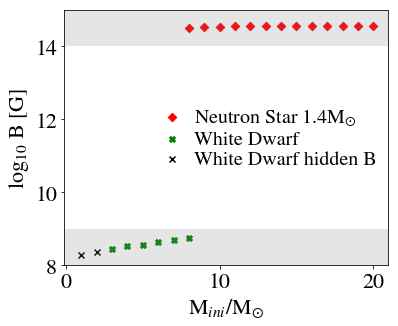

In [58]:
#plt.scatter(num[1:9],np.log10(WD_lowR)[1:9], marker='^', color='red', label = '$White\,Dwarf\,0.008R_{\odot}$')
#plt.scatter(num[1:9],np.log10(WD_highR[1:9]), marker='o', color='green', label = '$White\,Dwarf\,0.02R_{\odot}$')
plt.scatter(num[8:],np.log10(NS_lowM)[8:], marker='D', color='red', label = 'Neutron Star 1.4M$_{\odot}$')
plt.scatter(num[3:9],np.log10(WD_trueR[3:9]), marker='X', color='green', label = 'White Dwarf')
plt.scatter(num[0:3],np.log10(WD_trueR[0:3]), marker='x', color='black', label = 'White Dwarf hidden B')

#plt.scatter(num[8:],np.log10(NS_highM)[8:], marker='x', color='black', label = '$Neutron\,Star\,2.16M_{\odot}$')

plt.axhspan(7.5, 9, facecolor='grey', alpha=0.2)
plt.axhspan(14, 15, facecolor='grey', alpha=0.2)
#plt.annotate('Region of strong WD B-fields', xy=(5, 9), xytext=(6, 10),
#            arrowprops=dict(facecolor='black', shrink=0.05),
#            )
#plt.annotate('Observed magnetar field range', xy=(5, 14), xytext=(5, 13),
#            arrowprops=dict(facecolor='black', shrink=0.05),
#            )

plt.legend(loc=5)
#plt.title('Initial mass of the star vs B field of \n magnetic field of the compact rememnant')
plt.ylim(8,15)
plt.xlabel('M$_{ini}$/M$_{\odot}$')
plt.ylabel('$\log_{10}$ B [G]')
plt.tight_layout()
plt.savefig('Colapsed_stars_Bfield.pdf') #, bbox_inches='tight'